In [3]:
%load_ext autoreload
%autoreload 2

# from dataraw_sampling_SETShatter import *
from collections import defaultdict, Counter
import itertools
import copy
import random
import json
import operator as op
from functools import reduce
from tqdm import tqdm
from itertools import chain, combinations
import numpy as np
import time
from dataraw_sampling_SimpleSET_idx_wildcard import *

In [4]:
# Simple SET
num_attributes=4; num_attr_vals=3;
N_train=0; N_val=5120; N_test=5120

sample_start_time = time.time()
data, stats = sample_queries(num_attributes, num_attr_vals, N_train, N_val, N_test)
sample_end_time = time.time()

print(f'Sample Time for {N_train+N_val+N_test} datapoints = {sample_end_time-sample_start_time} seconds')


save_start_time = time.time()
filename_dat = '../Raw_Datasets/SET/WildCardSETidx-{}Attr-{}Vals-{}Train-{}Val-{}Test.json'.format(
    num_attributes, num_attr_vals, N_train, N_val, N_test)
with open(filename_dat, 'w') as f:
    json.dump(data, f)
save_end_time = time.time()

# filename = '../Raw_Datasets/SET/SimpleSETidx-{}Attr-{}Vals-{}Train-{}Val-{}Test-Stats.json'.format(
#     num_attributes, num_attr_vals, query_length_multiplier, nest_depth_int, N_train, N_val, N_test)
# with open(filename, 'w') as f:
#     json.dump(stats, f)
# save_end_time = time.time()

print(f'Saving Time for {N_train+N_val+N_test} datapoints = {save_end_time-save_start_time} seconds')

 15%|█▌        | 1556/10240 [00:00<00:00, 15555.27it/s]

Time to build cardpair_answer_lookup: 0.0003256797790527344 seconds


100%|██████████| 10240/10240 [00:00<00:00, 13684.86it/s]


Sample Time for 10240 datapoints = 0.7563388347625732 seconds
Saving Time for 10240 datapoints = 0.096771240234375 seconds


In [5]:
filename_dat

'../Raw_Datasets/SET/WildCardSETidx-4Attr-3Vals-0Train-5120Val-5120Test.json'

In [8]:
1.874403715133667 / 20

0.09372018575668335

In [2]:
num_cards = 4 ** 4
num_cards

card2idx_lookup, idx2card_lookup = construct_card_idx_lookup(4, 3)


In [7]:
len(card2idx_lookup)

256

In [9]:
card2idx_lookup, idx2card_lookup = construct_card_idx_lookup(2, 3)

xy = np.zeros((256, 3**2))

for i, cardpair_idxs in enumerate(itertools.product(*[range(4**2), range(4**2)])):
    card1_idx, card2_idx = cardpair_idxs
    card1_prop = idx2card_lookup[card1_idx]
    card2_prop = idx2card_lookup[card2_idx]
    keys_prop = resolve(card1_prop, card2_prop, (0,1,2), set((0,1,2)))
    keys_idx = [card2idx_lookup[kp] for kp in keys_prop]
    xy[i, keys_idx] += 1

np.sum(xy) / (256 * 3**2)

0.390625

In [8]:
card2idx_lookup, idx2card_lookup = construct_card_idx_lookup(3, 3)

xy = np.zeros((4096, 3**3))

for i, cardpair_idxs in enumerate(itertools.product(*[range(4**3), range(4**3)])):
    card1_idx, card2_idx = cardpair_idxs
    card1_prop = idx2card_lookup[card1_idx]
    card2_prop = idx2card_lookup[card2_idx]
    keys_prop = resolve(card1_prop, card2_prop, (0,1,2), set((0,1,2)))
    keys_idx = [card2idx_lookup[kp] for kp in keys_prop]
    xy[i, keys_idx] += 1

np.sum(xy) / (4096 * 3**3)

0.244140625

In [4]:
card2idx_lookup, idx2card_lookup = construct_card_idx_lookup(4, 3)

xy = np.zeros((65536, 3**4))

for i, cardpair_idxs in enumerate(itertools.product(*[range(4**4), range(4**4)])):
    card1_idx, card2_idx = cardpair_idxs
    card1_prop = idx2card_lookup[card1_idx]
    card2_prop = idx2card_lookup[card2_idx]
    keys_prop = resolve(card1_prop, card2_prop, (0,1,2), set((0,1,2)))
    keys_idx = [card2idx_lookup[kp] for kp in keys_prop]
    xy[i, keys_idx] += 1

np.sum(xy) / (65536 * 3**4)

0.152587890625

In [11]:
card2idx_lookup, idx2card_lookup = construct_card_idx_lookup(5, 3)

xy = np.zeros((1048576, 3**5))

for i, cardpair_idxs in enumerate(itertools.product(*[range(4**5), range(4**5)])):
    card1_idx, card2_idx = cardpair_idxs
    card1_prop = idx2card_lookup[card1_idx]
    card2_prop = idx2card_lookup[card2_idx]
    keys_prop = resolve(card1_prop, card2_prop, (0,1,2), set((0,1,2)))
    keys_idx = [card2idx_lookup[kp] for kp in keys_prop]
    xy[i, keys_idx] += 1

np.sum(xy) / (1048576 * 3**5)

0.095367431640625

In [ ]:
card2idx_lookup, idx2card_lookup = construct_card_idx_lookup(6, 3)
xy = np.zeros((16777216, 3**6))

for i, cardpair_idxs in enumerate(itertools.product(*[range(4**6), range(4**6)])):
    card1_idx, card2_idx = cardpair_idxs
    card1_prop = idx2card_lookup[card1_idx]
    card2_prop = idx2card_lookup[card2_idx]
    keys_prop = resolve(card1_prop, card2_prop, (0,1,2), set((0,1,2)))
    keys_idx = [card2idx_lookup[kp] for kp in keys_prop]
    xy[i, keys_idx] += 1

np.sum(xy) / (16777216 * 3**4)

In [10]:
len(list(itertools.product(*[range(4**5), range(4**5)])))

1048576

In [6]:
len(list(itertools.product(*[range(9), range(9)])))

81

In [7]:
3**4

81

In [14]:
np.linalg.matrix_rank(xy)

81

In [5]:
s = np.linalg.svd(xy, compute_uv=False)

In [6]:
import matplotlib.pyplot as plt

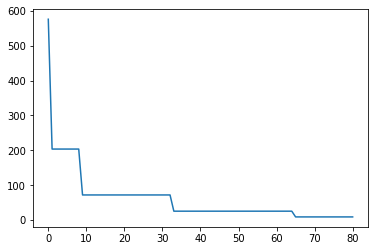

In [7]:
plt.plot(s)

In [8]:
s

array([576.        , 203.64675298, 203.64675298, 203.64675298,
       203.64675298, 203.64675298, 203.64675298, 203.64675298,
       203.64675298,  72.        ,  72.        ,  72.        ,
        72.        ,  72.        ,  72.        ,  72.        ,
        72.        ,  72.        ,  72.        ,  72.        ,
        72.        ,  72.        ,  72.        ,  72.        ,
        72.        ,  72.        ,  72.        ,  72.        ,
        72.        ,  72.        ,  72.        ,  72.        ,
        72.        ,  25.45584412,  25.45584412,  25.45584412,
        25.45584412,  25.45584412,  25.45584412,  25.45584412,
        25.45584412,  25.45584412,  25.45584412,  25.45584412,
        25.45584412,  25.45584412,  25.45584412,  25.45584412,
        25.45584412,  25.45584412,  25.45584412,  25.45584412,
        25.45584412,  25.45584412,  25.45584412,  25.45584412,
        25.45584412,  25.45584412,  25.45584412,  25.45584412,
        25.45584412,  25.45584412,  25.45584412,  25.45

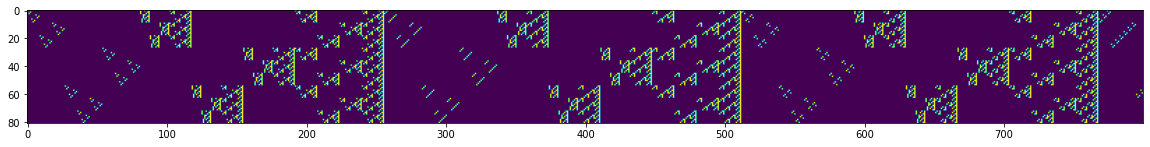

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(xy.T[:,:800])